## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião logo após retirar o trem de pouso frontal do solo no momento da decolagem* é:

\begin{align*}
        L(s)_{Ta\xrightarrow{} \theta} = \frac{0.0166 +0.000528 s+0.000328 s^2+3.05*10^{-7} s^3+6.33456*10^{-8} s^4}{-262625 -8353.09 s+ 278342 s^2+8901.38 s^3+5183.97 s^4+4.98525 s^5+s^6} 
\end{align*}


O sistema tem um polo de malha aberta no semi-plano direito, como pode ser observado na matriz de polos: 

\begin{align*}
Polos \;=\;
\begin{pmatrix}
  -1.6413 +71.5637i \\
  -1.6413 -71.5637i\\
  -0.8515 + 7.3848i\\
  -0.8515 - 7.3848i\\
   0.9663 + 0.0000i\\
  -0.9660 + 0.0000i\\
\end{pmatrix}
\end{align*}

Como visto pela matriz de zeros, o sistema é do tipo 0:

\begin{align*}
Zeros \;=\;
\begin{pmatrix}
  -1.6133 +71.5521i \\
  -1.6133 -71.5521i \\
  -0.7975 + 7.1081i \\
  -0.7975 - 7.1081i \\
\end{pmatrix}
\end{align*}


## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião logo após retirar o trem de pouso frontal do solo no momento da decolagem* é:

\begin{align*}
        L(s)_{Ta\xrightarrow{} \theta} = \frac{0.0166 +0.000528 s+0.000328 s^2+3.05*10^{-7} s^3+6.33456*10^{-8} s^4}{-262625 -8353.09 s+ 278342 s^2+8901.38 s^3+5183.97 s^4+4.98525 s^5+s^6} 
\end{align*}


O sistema tem um polo de malha aberta no semi-plano direito, como pode ser observado na matriz de polos: 

\begin{align*}
Polos \;=\;
\begin{pmatrix}
  -1.6413 +71.5637i \\
  -1.6413 -71.5637i\\
  -0.8515 + 7.3848i\\
  -0.8515 - 7.3848i\\
   0.9663 + 0.0000i\\
  -0.9660 + 0.0000i\\
\end{pmatrix}
\end{align*}

Como visto pela matriz de zeros, o sistema é do tipo 0:

\begin{align*}
Zeros \;=\;
\begin{pmatrix}
  -1.6133 +71.5521i \\
  -1.6133 -71.5521i \\
  -0.7975 + 7.1081i \\
  -0.7975 - 7.1081i \\
\end{pmatrix}
\end{align*}


In [53]:
'''
%pip install matplotlib 
%pip install ipympl 
%pip install numpy 
%pip install sympy 
%pip install control 
%pip install tbcontrol
%pip install matplotlib ipympl jupyter

'''

'\n%pip install matplotlib \n%pip install ipympl \n%pip install numpy \n%pip install sympy \n%pip install control \n%pip install tbcontrol\n%pip install matplotlib ipympl jupyter\n\n'

In [59]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import sympy as sp
import control as ct
from tbcontrol.symbolic import routh
import matplotlib.transforms as transforms

s = ct.tf([1, 0], [1])

In [60]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Função de transferência de malha aberta na forma canônica

In [61]:
zeros = np.array([-1.6133 + (71.5521j),  -1.6133 - (71.5521j),  -0.7975 + (7.1081j),  -0.7975 - (7.1081j)])
poles = np.array([-1.6413 + (71.5637j),  -1.6413 - (71.5637j),  -0.8515 + (7.3848j),  -0.8515 - (7.3848j),   0.9663,  -0.9660])
Knum = 6.33456*10**(-8)
'''poles = np.array([-1.93323,-1.64117 - 71.5636j,-1.64117 + 71.5636j,-0.850794 - 7.29819j,-0.850794 + 7.29819j,1.93191])
zeros=np.array([-1.49944 - 71.504j, -1.49944 + 71.504j, -0.575829 -  6.04625j, -0.575829 + 6.04625j])
Knum = 4.08574'''
N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0 #Função de transferência na forma canônica

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([ 1.00000000e+00,  4.98530000e+00,  5.18397267e+03,  8.90145739e+03,
        2.78314545e+05, -8.39977113e+03, -2.64311757e+05]))

In [57]:
# def tf_to_ss(numer, denom):
#     # Get the order of the transfer function
#     n = len(numer) - 1
#     m = len(denom) - 1
    
#     # Create companion matrices
#     A = np.zeros((m, m))
#     A[:-1, 1:] = np.eye(m-1)
#     A[-1, :] = -np.array(denom[1:]) / denom[0]
    
#     B = np.zeros((m, 1))
#     B[-1, 0] = 1 / denom[0]
    
#     C = np.zeros((1, m))
#     C[0, :n+1] = np.array(numer) / denom[0]  # Adjusted to include all coefficients of numerator
    
#     D = np.array([[0]])  # For proper dimensions
    
#     return A, B, C, D

# numer = [1, 4.822, 5179, 8335, 2.621 * 10**5]
# denom = [1, 4.985, 5184, 8901, 2.783 * 10**5, -8400, -2.643 * 10**5]  # Corrected scientific notation

# # Convert to state-space representation
# A, B, C, D = tf_to_ss(numer,denom)

# # Print the state-space matrices
# print("Representação da FT na forma de Espaço de Estados")
# print("A =\n", A)
# print("B =\n", B)
# print("C =\n", C)
# print("D =\n", D)

### 2. Determinação dos ganhos críticos via tabela de Routh

### 3. Síntese de um controlador PID via lugar das raízes

#### 3.1. Síntese de um compensador proporcional 

Lugar das raízes de $L(s)$

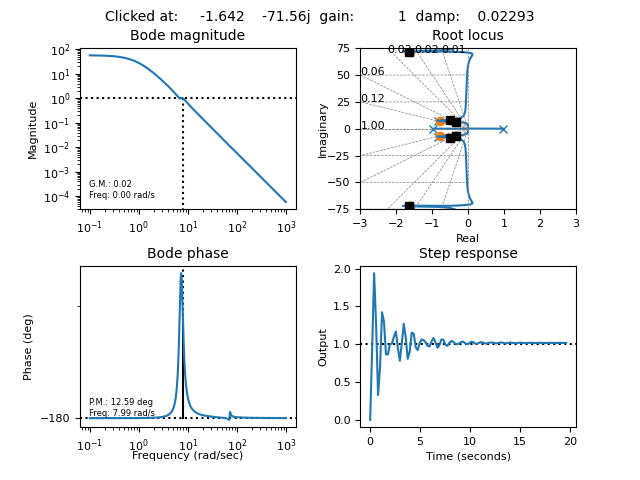

In [5]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(58*L_0, xlim_rlocus=(-3, 3), ylim_rlocus=(-75, 75),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

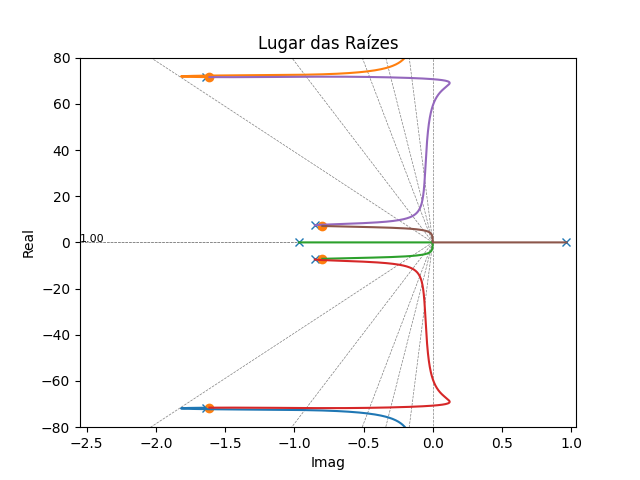

In [6]:
'''plt.close()
ct.rlocus(L_0)
plt.show()'''

plt.close()
def findlines(artist):
    return (isinstance(artist, plt.Line2D)
            and artist.get_linestyle()=='-'
            and isinstance(artist.get_xdata(), np.ndarray))
ct.rlocus(L_0)
plt.ylim(-80, 80)
h = plt.gca().findobj(match=findlines)
for i, h_ in enumerate(h): h_.set_color(f'C{i}')

# Definindo os títulos dos eixos X e Y
plt.xlabel('Imag')
plt.ylabel('Real')
plt.title('Lugar das Raízes')

# Exibindo o gráfico
plt.show()

A partir do lugar das raízes $L(s)$, pode-se escolher como valor inicial para o ganho $K_c =  58,1 \approx 58$ que, tirando o $K_{num}$, resulta em um ganho proporcional de $K_p = 9,16*10^8$.

In [114]:
K_p = 58
G_leadP = (28.14*s+80.8)/(s+5.855)
G_lead = (3.797*s+3.188)/(s+2.025)

#### 3.2. Síntese de um compensador PI

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-integral* (PI), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PI}}(s) = \left( K_p + \frac{K_i}{s} \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} +  K_i \frac{N(s)}{s D(s)} = 0
    \\ 
    & s[D(s) + K_p N(s)] +  K_i N(s) = 0
    \\ 
    & 1 +  K_i \underbrace{\frac{N(s)}{s [D(s) + K_p N(s)]}}_{\displaystyle L_1(s)} = 0
\end{align*}


In [63]:
K_p = 58
L_1 = N/(s * (D + K_p * N))
L_1

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([1.00000000e+00, 4.98530000e+00, 5.24197267e+03, 9.18111019e+03,
       5.78674115e+05, 4.75039164e+05, 1.49353280e+07, 0.00000000e+00]))

Lugar das raízes de $L_1(s)$ e ajuste de $K_i$ 

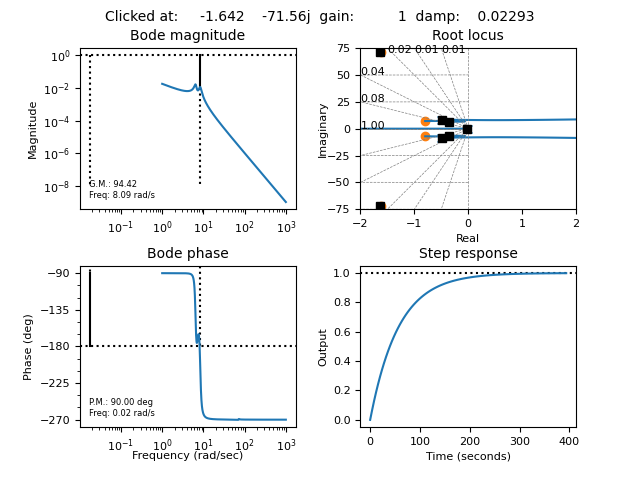

In [68]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)
plt.draw()  

A partir da análise do lugar das raízes para $L_1(s)$, chega-se a $K_{i_c} = 0.2 \ \text{s}^{-1}$ como escolha razoável para o ganho, resultando em $K_p = 0.05$.

Assim pode-se calcular $T_i$ pela expressão:
$$T_i = \frac{K_p}{K_i}$$

In [64]:
K_i = 50
T_i = K_p/K_i
T_i

1.16

Assumindo os valor calculados para $T_i$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PI}}(s) = K_c \left(1 + \frac{1}{T_i s}\right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s)N(s)}{s T_i D(s)}}_{\displaystyle L_2(s)} = 0
\end{align*}


In [65]:
L_2 = (1 + T_i * s) * N/(s * T_i * D)
L_2

TransferFunction(array([1.16000000e+00, 6.59305600e+00, 6.01201299e+03, 1.48473920e+04,
       3.12327950e+05, 2.62062755e+05]), array([ 1.16000000e+00,  5.78294800e+00,  6.01340830e+03,  1.03256906e+04,
        3.22844872e+05, -9.74373452e+03, -3.06601638e+05,  0.00000000e+00]))

Lugar das raízes de $L_2(s)$ e ajuste fino de $K_c$

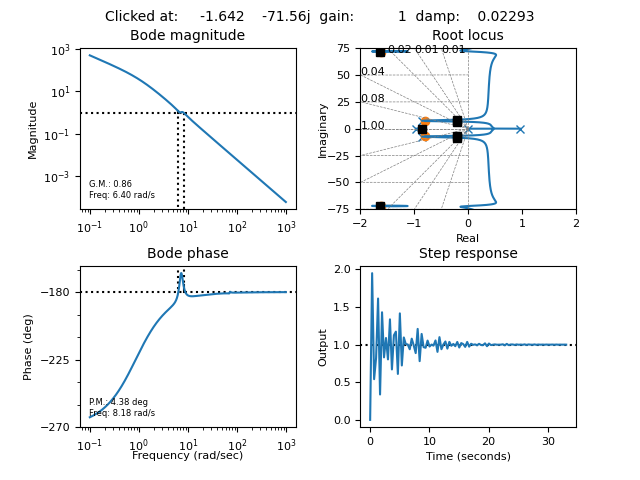

In [25]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(60*L_2, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Obtém-se assim $K_c = 91$ = $K_p = 14,3656*10^8$, o que leva o seguinte compensador PI:

In [66]:
K_c_PI = 60

G_c_PI = K_c_PI * (1 + 1/(T_i * s))

gm, pm, wcg, wcp = ct.margin(G_c_PI*L_0)
print('ganho:', gm, 'fase:', pm)


ganho: 0.8617697229428734 fase: 4.383060853325674


Diagrama de Bode do compensador PI sintetizado

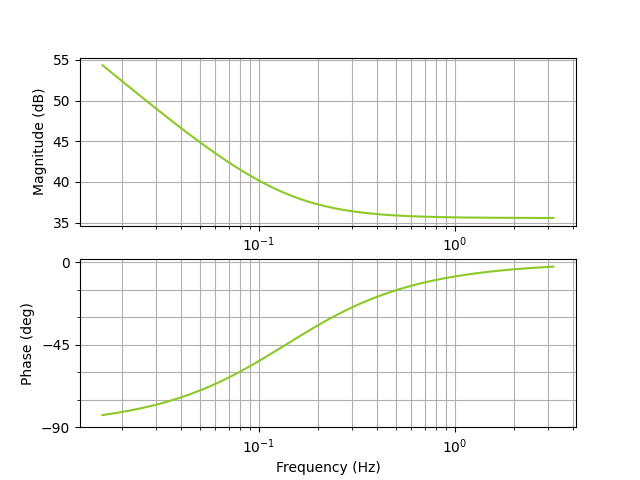

In [67]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PI,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['green'],
                                   dB=True, Hz=True)

#### 3.3. Síntese de um compensador PID

Podemos agora trocar o controlador *proporcional-integral* (PI) por um *proporcional-integral-derivativo* (PID), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PID}}(s) = \left( K_p + \frac{K_i}{s} + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + K_i \frac{N(s)}{s D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & s D(s) + (K_p s + K_i)N(s) + K_d s^2 N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s^2 N(s)}{s D(s) + (K_p s + K_i)N(s)}}_{\displaystyle L_3(s)} = 0
\end{align*}

In [68]:
L_3 = (s * s * N)/(s * D + (K_p * s + K_i) * N)
L_3

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05, 0.00000000e+00, 0.00000000e+00]), array([1.00000000e+00, 4.98530000e+00, 5.24197267e+03, 9.23111019e+03,
       5.78915195e+05, 7.33969827e+05, 1.53520857e+07, 1.31031378e+07]))

Lugar das raízes de $L_3(s)$ e ajuste de $K_d$

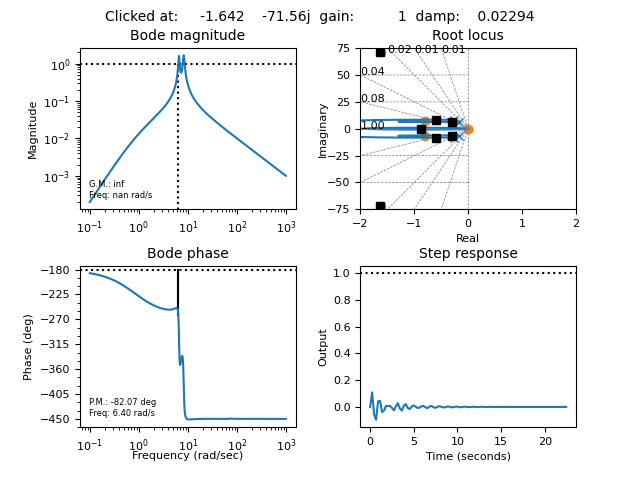

In [69]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_3, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_3(s)$, chega-se a $K_{d_c} = 4 \ \text{s}$ ($K_d = 63,1456*10^6$) como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [70]:
K_d = 15
T_d = K_d/K_p
T_d

0.25862068965517243

Finalmente, assumindo os valores calculados para $T_i$ e $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PID}}(s) = K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s + T_d T_i s^2)N(s)}{s T_i D(s)}}_{\displaystyle L_4(s)} = 0
\end{align*}


In [71]:
L_4 = ((1 + T_i * s + T_d * T_i * s * s) * N)/(s * T_i * D)
L_4

TransferFunction(array([3.00000000e-01, 2.60648000e+00, 1.56017704e+03, 8.51255921e+03,
       9.34662185e+04, 3.12327950e+05, 2.62062755e+05]), array([ 1.16000000e+00,  5.78294800e+00,  6.01340830e+03,  1.03256906e+04,
        3.22844872e+05, -9.74373452e+03, -3.06601638e+05,  0.00000000e+00]))

Lugar das raízes de $L_4(s)$ e ajuste fino de $K_c$

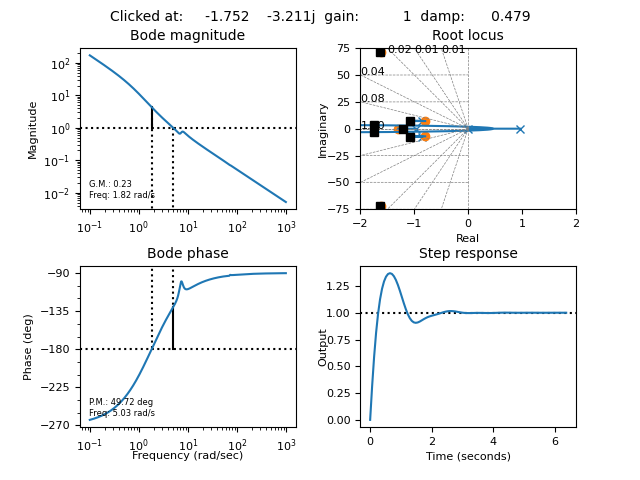

In [79]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(20*L_4, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 55$ ($K_p =86,825*10^7$), tem-se o seguinte compensador PID:

In [72]:
K_c_PID = 20
N_d = 1000
G_c_PID = K_c_PID * (1 + 1/(T_i * s) + (T_d * s)/(1 + T_d * s/N_d))
G_c_PID
gm, pm, wcg, wcp = ct.margin(G_c_PID*L_0)
print('ganho:', gm, 'fase:', pm)


ganho: 0.23130734741767772 fase: 49.69578530871195


Diagrama de Bode do compensador PID sintetizado

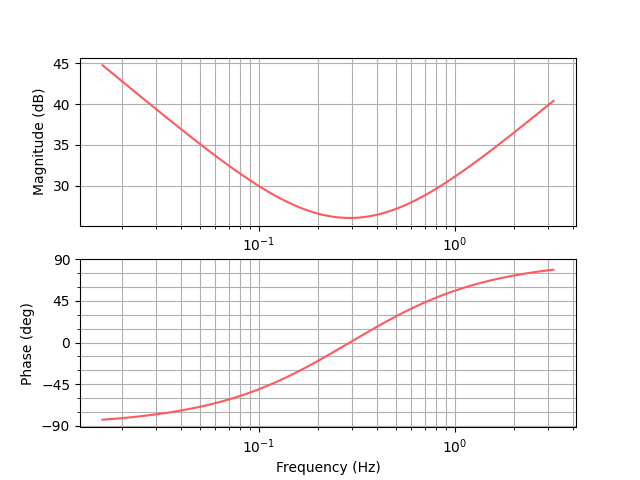

In [73]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PID,
                                omega=np.linspace(0.1, 20, 1001),
                                color=cp['red'],
                                dB=True, Hz=True)

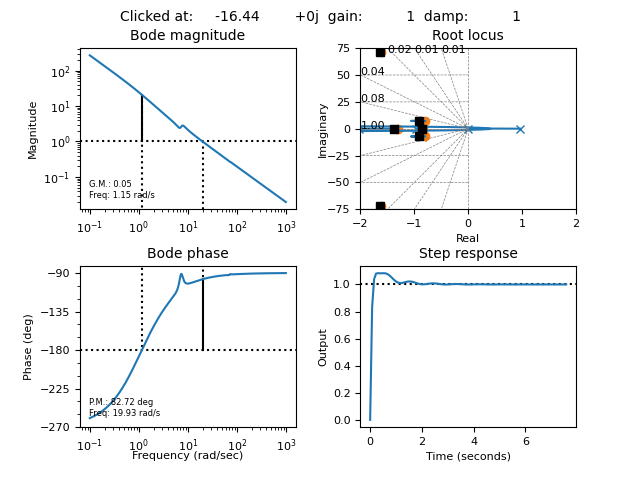

In [38]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(K_c_PID*L_4*G_lead, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

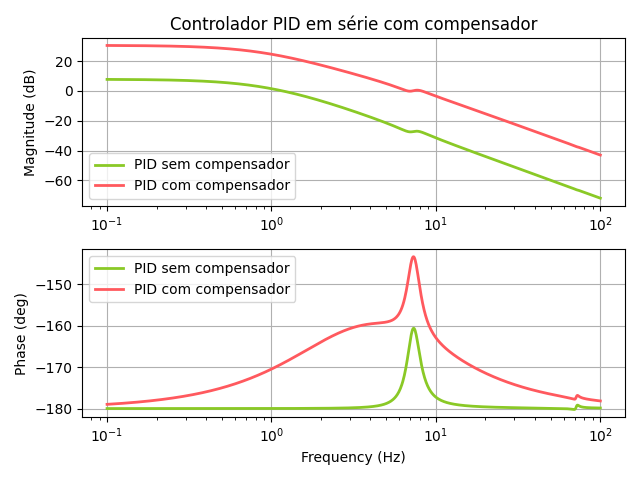

In [119]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Controlador PID em série com compensador')
mag_PI, phase_PI, omega_PI = ct.bode(
    2.5*L_0, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    2.5*G_leadP*L_0, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PID sem compensador', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID com compensador', color=cp['red'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PID sem compensador', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID com compensador', color=cp['red'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 3.4. Síntese de um compensador PD

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-derivativo* (PD), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PD}}(s) = \left( K_p + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & D(s) + K_p N(s) + K_d s N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s N(s)}{D(s) + K_p N(s)}}_{\displaystyle L_5(s)} = 0
\end{align*}

In [74]:
L_5 = (s * N)/(D + K_p * N)
L_5

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05, 0.00000000e+00]), array([1.00000000e+00, 4.98530000e+00, 5.24197267e+03, 9.18111019e+03,
       5.78674115e+05, 4.75039164e+05, 1.49353280e+07]))

Lugar das raízes de $L_5(s)$ e ajuste de $K_d$

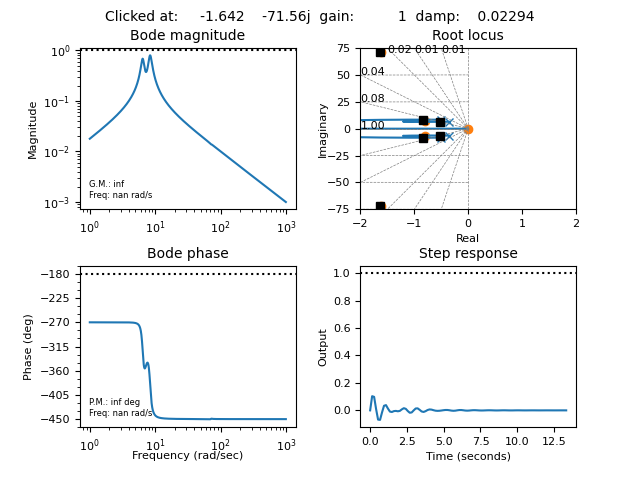

In [32]:
plt.close()

plt.ion()  # ativar o modo interativo
ct.sisotool(L_5, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_5(s)$, chega-se a $K_{d_c} = 2 \ \text{s}$ ($K_d = 31,573*10^6$) como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [75]:
K_d = 3.7
T_d = K_d/K_p
T_d

0.06379310344827586

Finalmente, assumindo os valor calculado para $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PD}}(s) = K_c \left(1 + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 +  K_c \underbrace{\frac{\left(1 + T_d s \right) N(s)}{D(s)}}_{\displaystyle L_6(s)} = 0
\end{align*}

In [76]:
L_6 = ((1 + T_d * s) * N)/D
L_6

TransferFunction(array([6.37931034e-02, 1.30758483e+00, 3.35181412e+02, 5.71033861e+03,
       2.50529505e+04, 2.62062755e+05]), array([ 1.00000000e+00,  4.98530000e+00,  5.18397267e+03,  8.90145739e+03,
        2.78314545e+05, -8.39977113e+03, -2.64311757e+05]))

Lugar das raízes de $L_6(s)$ e ajuste fino de $K_c$

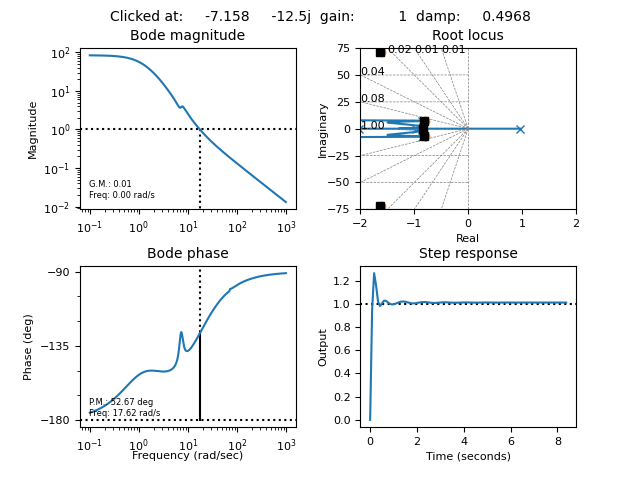

In [82]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(54*L_6*G_lead, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 59$ ($K_p = 93,139*10^7$), tem-se o seguinte compensador PD:


In [101]:
K_c_PD = 54
N_d = 1000

G_c_PD = K_c_PD * (1 + (T_d * s)/(1 + T_d * s/N_d))
G_c_PD
G_c_P = 58

Diagrama de Bode do compensador PD sintetizado

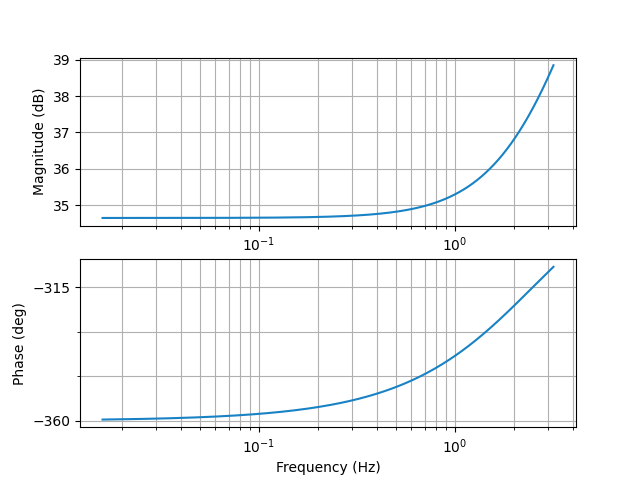

In [78]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PD,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['blue'],
                                   dB=True, Hz=True)

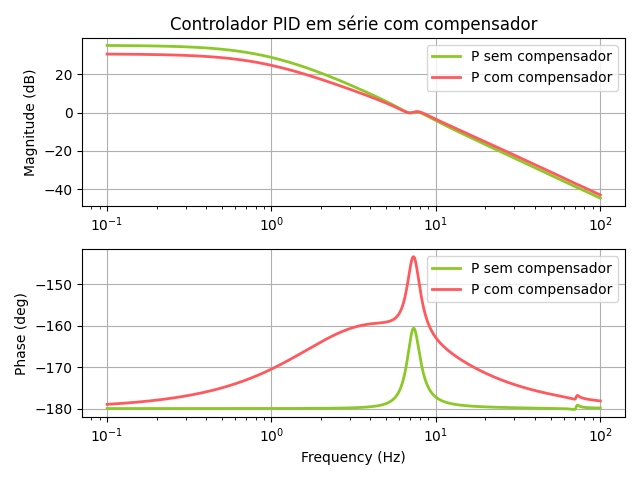

In [122]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Controlador PID em série com compensador')
mag_PI, phase_PI, omega_PI = ct.bode(
    58*L_0, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    2.5*G_leadP*L_0, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='P sem compensador', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='P com compensador', color=cp['red'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='P sem compensador', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='P com compensador', color=cp['red'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
G_lead = (3.797*s+3.188)/(s+2.025)

gm, pm, wcg, wcp = ct.margin(G_c_PID*G_lead*L_0)
print('ganho:', gm, 'fase:', pm)

ganho: 0.047962668789592336 fase: 82.4437111382835


### 4. Análise das respostas em malha fechada com compensadores PI, PD e PID

#### 4.1. Função de transferência entre referência (r) e saída (c)

In [52]:
rc_tf_PI = ct.feedback(G_c_PI* L_0)



Função de transferência PI:


TransferFunction(array([6.96000000e+01, 3.95583360e+02, 3.60720780e+05, 8.90843518e+05,
       1.87396770e+07, 1.57237653e+07]), array([1.16000000e+00, 5.78294800e+00, 6.08300830e+03, 1.07212739e+04,
       6.83565652e+05, 8.81099784e+05, 1.84330754e+07, 1.57237653e+07]))

In [102]:
rc_tf_PD = ct.feedback(G_c_PD* L_0)
rc_tf_PDC = ct.feedback(G_c_PD*G_lead* L_0) #PD COM COMPENSADOR
rc_tf_PID = ct.feedback(G_c_PID* L_0)
rc_tf_P = ct.feedback(2.5*G_leadP*L_0) #P COM COMPENSADOR

rc_tf_PIDC = ct.feedback(G_c_PID*G_lead* L_0) #PID COM COMPENSADOR
rc_tf_PC = ct.feedback(2.5*G_leadP*L_0)

Função de transferência PD:


Função de transferência PID:


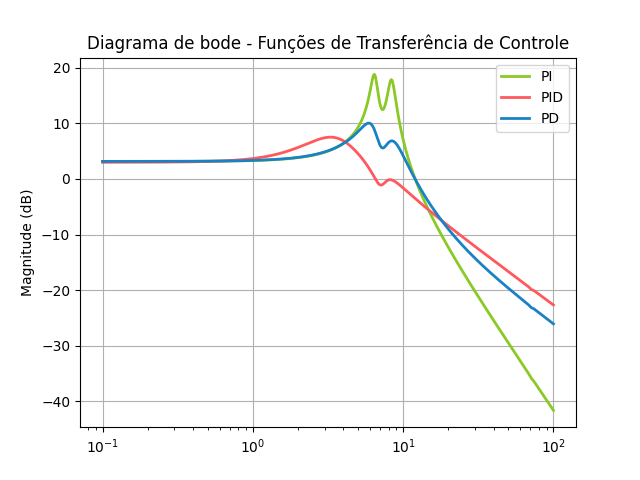

ganho PID: 0.017389343462100214 fase PID: 12.589960521440503
ganho PI: 0.8617697229428734 fase PI: 4.383060853325674
ganho PD: 0.01867744297781134 fase PD: 37.613680201006844


In [110]:
plt.figure()
plt.title('Diagrama de bode - Funções de Transferência de Controle')
mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_P, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI)+3,
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID)+3,
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD)+3,
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.show()

gm, pm, wcg, wcp = ct.margin(G_c_P*L_0)
print('ganho PID:', gm,'fase PID:',pm)

gm, pm, wcg, wcp = ct.margin(G_c_PI*L_0)
print('ganho PI:', gm,'fase PI:',pm)

gm, pm, wcg, wcp = ct.margin(G_c_PD*L_0)
print('ganho PD:', gm,'fase PD:',pm)
      


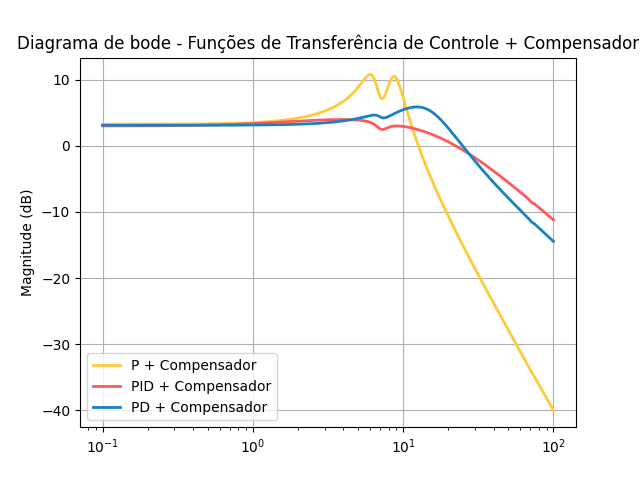

ganho PIDC: 0.047962668789592336 fase PIDC: 82.4437111382835
ganho PC: inf fase PC: inf
ganho PDC: 0.011863808666897104 fase PDC: 52.64575769318904


In [127]:
K_p = 2.5
G_leadP = (28.14*s+80.8)/(s+5.855)
G_lead = (3.797*s+3.188)/(s+2.025)

plt.figure()
plt.title('Diagrama de bode - Funções de Transferência de Controle + Compensador')
mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_PC, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PIDC, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PDC, dB=True, Hz=True, omega_limits=(0.1, 100), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI)+3,
             label='P + Compensador', color=cp['yellow'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID)+3,
             label='PID + Compensador', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD)+3,
             label='PD + Compensador', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.show()

gm, pm, wcg, wcp = ct.margin(G_c_PID*G_lead*L_0)
print('ganho PIDC:', gm,'fase PIDC:',pm)

gm, pm, wcg, wcp = ct.margin(G_c_P*G_leadP)
print('ganho PC:', gm,'fase PC:',pm)

gm, pm, wcg, wcp = ct.margin(G_c_PD*G_lead*L_0)
print('ganho PDC:', gm,'fase PDC:',pm)

#### 4.2. Função de transferência entre referência (r) e entrada de controle (u)

In [43]:
ru_tf_PI = ct.feedback(G_c_PI, L_0)
ru_tf_PD = ct.feedback(G_c_PD, L_0)
ru_tf_PID = ct.feedback(G_c_PID, L_0)
ru_tf_P = ct.feedback(2.5, L_0)
G_leadP = (28.14*s+80.8)/(s+5.855)
G_lead = (3.797*s+3.188)/(s+2.025)

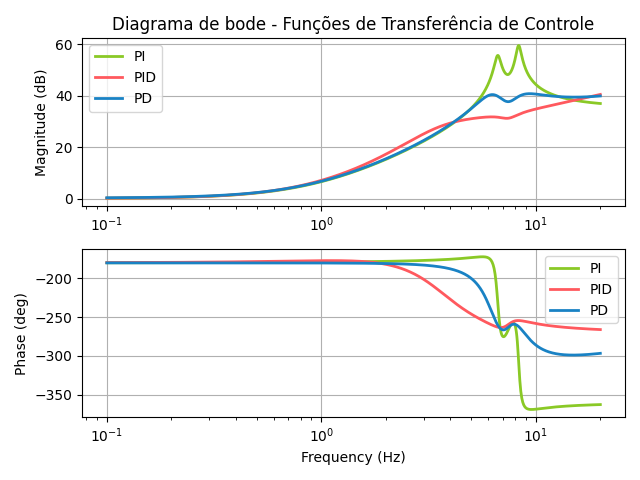

In [38]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Diagrama de bode - Funções de Transferência de Controle')
mag_PI, phase_PI, omega_PI = ct.bode(
    ru_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    ru_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    ru_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.3. Resposta a degrau

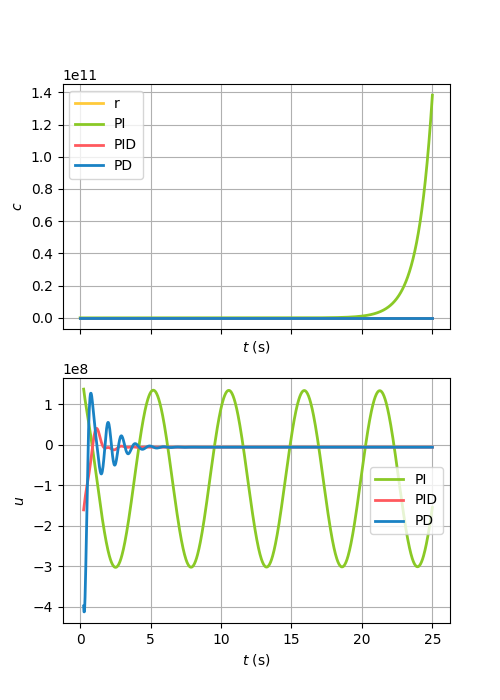

In [56]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

K_p = 58
G_leadP = (28.14*s+80.8)/(s+5.855)
G_lead = (3.797*s+3.188)/(s+2.025)

ref = 13*np.pi/180

t, y_PI = ct.step_response(L_0*2.5*G_leadP*ref, ts)
t, u_PI = ct.step_response(ru_tf_P*G_leadP*ref/Knum, ts)

t, y_PID = ct.step_response(rc_tf_PID*G_lead*ref, ts)
t, u_PID = ct.step_response(ru_tf_PID*G_lead*ref/Knum, ts)

t, y_PD = ct.step_response(rc_tf_PD*G_lead*ref, ts)
t, u_PD = ct.step_response(ru_tf_PD*G_lead*ref/Knum, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, ref*np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t[10:], u_PI[10:], color=cp['green'], 
                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 4.4. Resposta a rampa

In [50]:
# simulação do sistema em MF
ts = np.linspace(0, 10, 1000)
tempo = 4
ref = -13*np.pi/180
U = []
for i, value in enumerate(ts):
    if ts[i] <= tempo:
     U.append(ts[i]*ref/tempo)
    else:
     U.append(ref)
     
offset = 13*np.pi/180  #offset da referência

U = np.where(ts <= tempo, ts * ref / tempo, ref) + offset # aplicando o offset

# t, y_PI = ct.forced_response(rc_tf_PI, ts, U=ts)
# t, u_PI = ct.forced_response(ru_tf_PI, ts, U=ts)

theta_0_PID = 13*np.pi/(180*1.74708503e+10)
theta_0_PD = 13*np.pi/(180*2.21832581e+11)

x0_PID = [0,0,0,0,0,0,0,theta_0_PID] #[vel_ang/5(?), 0, 0, 0, 0, 0, 0, ang/(1.7*10**10)]
x0_PD = [0,0,0,0,0,0,theta_0_PD]

t, y_PID = ct.forced_response(rc_tf_PID, ts, U, x0_PID)
t, u_PID = ct.forced_response(ru_tf_PID/Knum, ts, U, x0_PID)

t, y_PD = ct.forced_response(rc_tf_PD, ts, U, x0_PD)
t, u_PD = ct.forced_response(ru_tf_PD/Knum, ts, U, x0_PD)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)
state.plot(t, U, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()
# control_input.plot(t[10:], u_PI[10:], color=cp['green'],
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()



NameError: name 'rc_tf_PID' is not defined

### 5. Resposta com perturbações

O modelo apresentado acima não considera perturbações. Em geral, esse não é um grande problema, contudo, a força gravitacional entra como uma perturbação no modelo. Isso faz com que os resultados possivelmente apresentem diferenças altas se a Sensibilidade $S(s)$ do sistema não for suficientemente pequena.

A dedução para inclusão das perturbações segue o equacionamento abaixo:

\begin{gather}
Y(s) = \underbrace{G_p(s)G_c(s)}_{L(s) = G(s)}E(s) + W(s)
\\
E(s) = R(s) - Y(s) \implies Y(s) = R(s)-E(s)
\\
R(s)-E(s) = L(s)E(s) + W(s) \Longleftrightarrow E(s)(1+L(s)) = R(s) - W(s)
\\
\implies E(s) = \left[R(s)-W(s)\right][1 + L(s)]^{-1} = \left[R(s)-W(s)\right]S(s) 
\\
Y(s) = L(s)S(s) \left[R(s)-W(s)\right] + W(s) \text{ , onde } L(s)S(s) = T(s)
\\
\text{Assim } Y(s) = T(s)R(s) + W(s)[1-T(s)]
\\
\;
\\
\text{Mas } T(s) + S(s) = L(s)S(s) + S(s) = S(s) [1 + L(s)] = [1 + L(s)]^{-1}[1 + L(s)]  = 1
\\
\text{Logo } Y(s) = T(s)R(s) + S(s)W(s)
\end{gather}



In [36]:
S_PI = 1 - rc_tf_PI
S_PD = 1 - rc_tf_PD
S_PID = 1 - rc_tf_PID

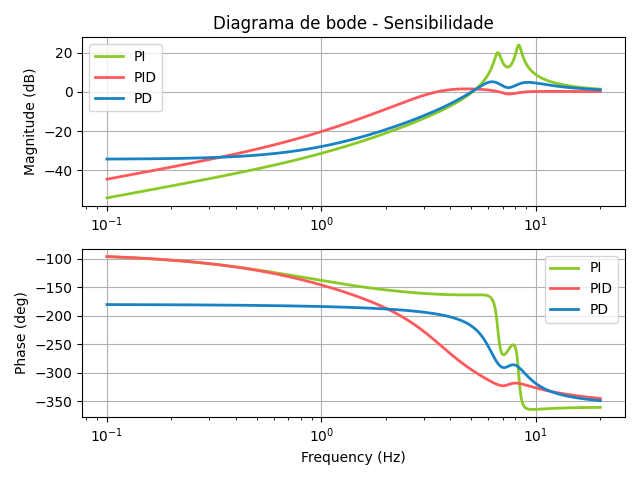

In [37]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    S_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    S_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    S_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()
plt.title('Diagrama de bode - Sensibilidade')
plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()